<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plots-areas-WT-vs-BAPN" data-toc-modified-id="Plots-areas-WT-vs-BAPN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plots areas WT vs BAPN</a></span><ul class="toc-item"><li><span><a href="#Load-area-data" data-toc-modified-id="Load-area-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load area data</a></span></li><li><span><a href="#Check-for-covariates" data-toc-modified-id="Check-for-covariates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Check for covariates</a></span><ul class="toc-item"><li><span><a href="#Combined-data" data-toc-modified-id="Combined-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Combined data</a></span></li></ul></li></ul></li></ul></div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import seaborn as sns

# Plots areas WT vs BAPN

## Load area data

In [4]:
save_folder = "/Users/dang/Documents/Projects/Tabler_skull/Model_parameters/plots/"

In [5]:
# Load data
#load_folder = '/Users/dang/Documents/Projects/Tabler_skull/Manuscript_cell_mvt_model/plots/flat_mount_alignments/'
load_file = "/Users/dang/Documents/Projects/Tabler_skull/Model_parameters/density_estimates.xlsx"
df = pd.read_excel(load_file)
df.head()

,Date,Condition,Embryonic_stage,Filename,z-slice,location,cell_count,pixel_area,pix_per_micron,Unnamed: 9,area_microns,cell_density_pixel,cell_density
0,2021-12-08,WT,14.0,WT_E14_wt_osx_wdPh3_edit.tif,21,mesenchyme,210,NaN,NaN,NaN,33830.0,NaN,0.006208
1,2021-12-08,WT,14.0,WT_E14_wt_osx_wdPh3_edit.tif,21,bone,287,NaN,NaN,NaN,37683.0,NaN,0.007616
2,2020-01-27,WT,NaN,270120mTmGOsxCREFrontImagingAiryFast_Airyscan ...,21,mesenchyme,287,NaN,NaN,NaN,38737.0,NaN,0.007409
3,2020-01-27,WT,NaN,270120mTmGOsxCREFrontImagingAiryFast_Airyscan ...,21,bone,274,NaN,NaN,NaN,26374.0,NaN,0.010389
4,2022-03-03,BAPN,14.0,Stitched_2022_03_03_BAPN_OsxCreGFP_DAPI_30x_20...,60,bone,609,469350.0,2.53,73325.626084,73325.0,0.001298,0.008305


In [18]:
print( [df[df['location']=='bone']['cell_density'].mean(),
    df[df['location']=='mesenchyme']['cell_density'].mean(),
    df[df['location']=='bone']['cell_density'].median(),
    df[df['location']=='mesenchyme']['cell_density'].median()
       ]
     )


[0.006571625893268926, 0.004754318830662807, 0.005792783846408474, 0.004794268522326357]


## Check for covariates

### Combined data

In [20]:
save_folder

'/Users/dang/Documents/Projects/Tabler_skull/Model_parameters/plots/'

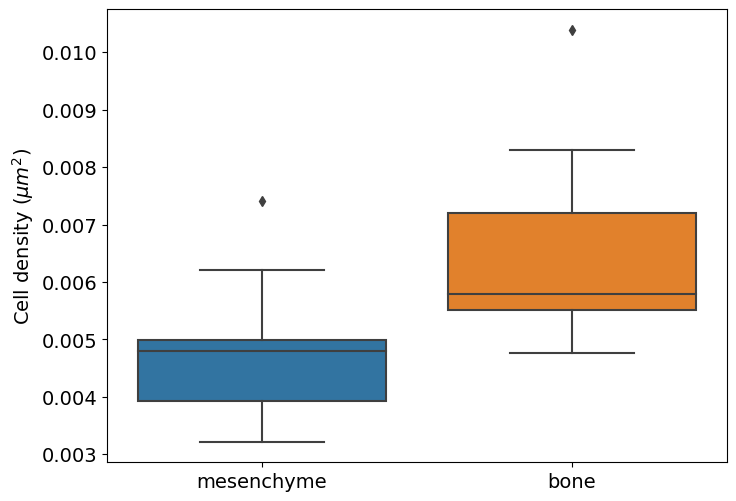

In [21]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
#sns.scatterplot(data=df_all, x=jitter(df_all.time, 0.04), y="Area", hue="Condition", x_jitter=0.1, ax=ax)
sns.boxplot(data=df, x="location", y="cell_density", ax=ax)

#sns.lineplot(data=df_data, x="time", y="area", estimator=np.mean )
plt.xlabel('')
plt.ylabel('Cell density ($\mu m^2$)')
plt.savefig(save_folder+'cell_densities_v1_incomplete.pdf')
plt.show()

In [22]:
# significance test
from scipy.stats import ttest_ind

filt1 = (df['location']=='mesenchyme')
filt2 = (df['location']=='bone') & (df['pixel_area']!=1.0)

ttest_ind(df[filt1].cell_density, df[filt2].cell_density)

Ttest_indResult(statistic=-2.9386310582578385, pvalue=0.008121319489451068)

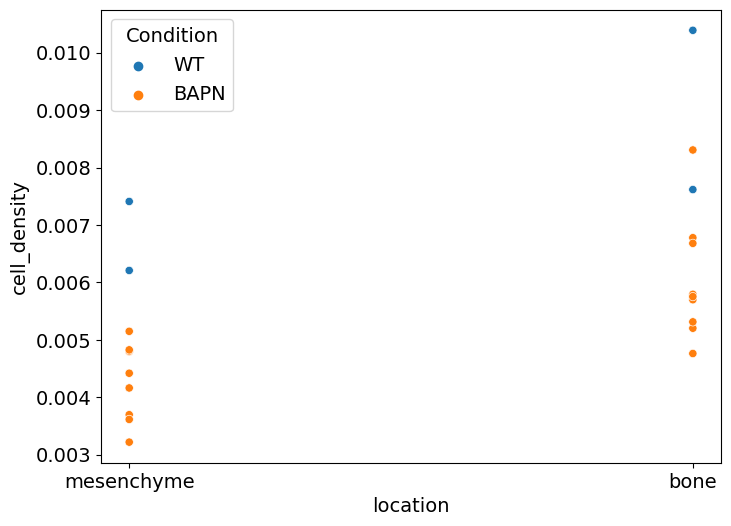

In [8]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
#sns.scatterplot(data=df_all, x=jitter(df_all.time, 0.04), y="Area", hue="Condition", x_jitter=0.1, ax=ax)
sns.scatterplot(data=df, x="location", y="cell_density", hue="Condition", ax=ax)

#sns.lineplot(data=df_data, x="time", y="area", estimator=np.mean )
# plt.xlabel('Time (d)')
# plt.ylabel('Area ($mm^2$)')
#plt.savefig(save_folder+'areas_jitter_0p4.pdf')
plt.show()

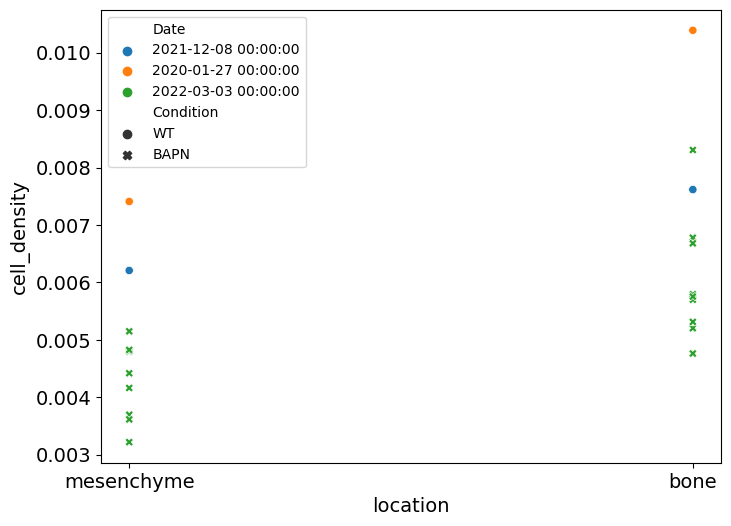

In [9]:
# By date
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
sns.scatterplot(data=df, x="location", y="cell_density", hue="Date", style='Condition', ax=ax)
# plt.xlabel('Time (d)')
# plt.ylabel('Area ($mm^2$)')
plt.legend(fontsize=10)
#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()

In [10]:
# pairwise comparison
# filename, z-slice
# str(df['z-slice'].loc[0]).join(df['Filename'][0])
df['fileID'] = [df['Filename'].loc[i] + '_z' + str(df['z-slice'].loc[i]) for i in range(df.shape[0])]

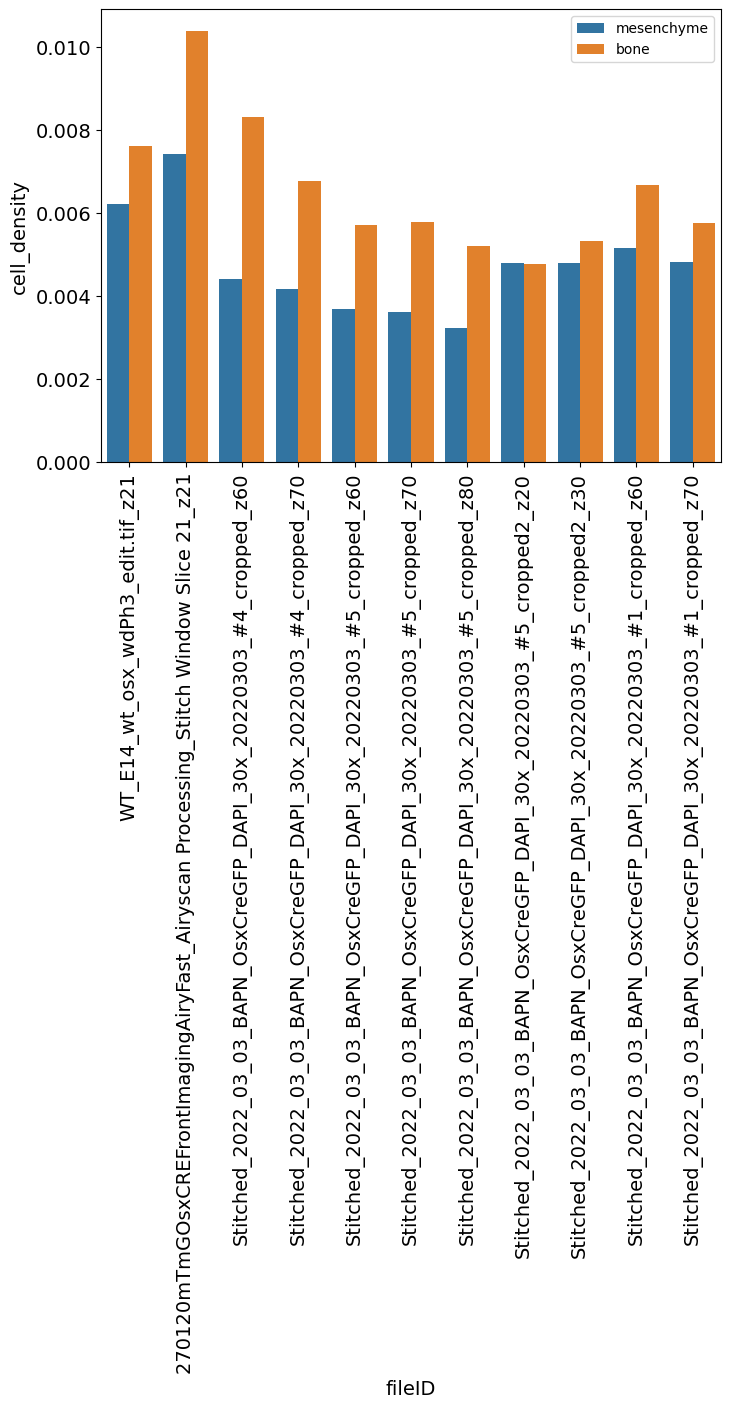

In [11]:
fig, ax = plt.subplots(dpi=100, figsize=(8, 6))
plt.rc('font', size=14) 
#sns.scatterplot(data=df, x="fileID", y="cell_density", hue='location', ax=ax)
sns.barplot(data=df, x="fileID", y="cell_density", hue='location', ax=ax)
# plt.xlabel('Time (d)')
# plt.ylabel('Area ($mm^2$)')
ax.tick_params(axis='x', rotation=90)
#ax.set_xticklabels([])
plt.legend(fontsize=10)
#plt.savefig(save_folder+'areas_by_date_new_samples.pdf')
plt.show()